# Ahmed Mamdouh Khaled 

# Import Libraries

Matplotlib is primarily used for basic chart plotting, while Seaborn offers many default themes and a wide variety of schemes for statistical visualization.It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library.

In [149]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
import panel as pn # type: ignore
pn.extension('tabulator') # that is for creating interactive tables
import hvplot.pandas # that is for creating interactive dataframes # type: ignore
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore
import warnings


# Reading data_set

In [150]:
SS = pd.read_csv("SampleSuperstore.csv")
SS.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data set Information

In [151]:
SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [152]:
SS.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

# Data Exploration

In [153]:
SS.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Checking For Nulls

In [154]:
SS[SS.columns[SS.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

# Removing Duplicates

In [155]:
SS = SS.drop_duplicates()
SS

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# FillNa in numeric columns


The inplace=True parameter in pandas methods specifies whether the operation should modify the DataFrame in place or return a new DataFrame with the changes applied.

In [156]:
#Sales, Quantity,  Discount,Profit  
def fillna_with_mean(column_names):
    for column_name in column_names:
        SS[column_name].fillna(SS[column_name].mean(), inplace=True)

c_names = ['Sales', 'Quantity', 'Discount', 'Profit']

fillna_with_mean(c_names)
warnings.filterwarnings("ignore", category=FutureWarning)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13692\1437125986.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  SS[column_name].fillna(SS[column_name].mean(), inplace=True)


# FillNa in Object Columns 


In [157]:
def fillna_object(columns):
    for column in columns :
        SS[column].fillna(SS[column].mode(),inplace = True)

Objects_Columns = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']

# Dropping Nonessencial Columns

In [158]:
# Assuming SS is your DataFrame
SS.drop(columns=['Postal Code'], inplace=True)


# Removing Outliers from the data

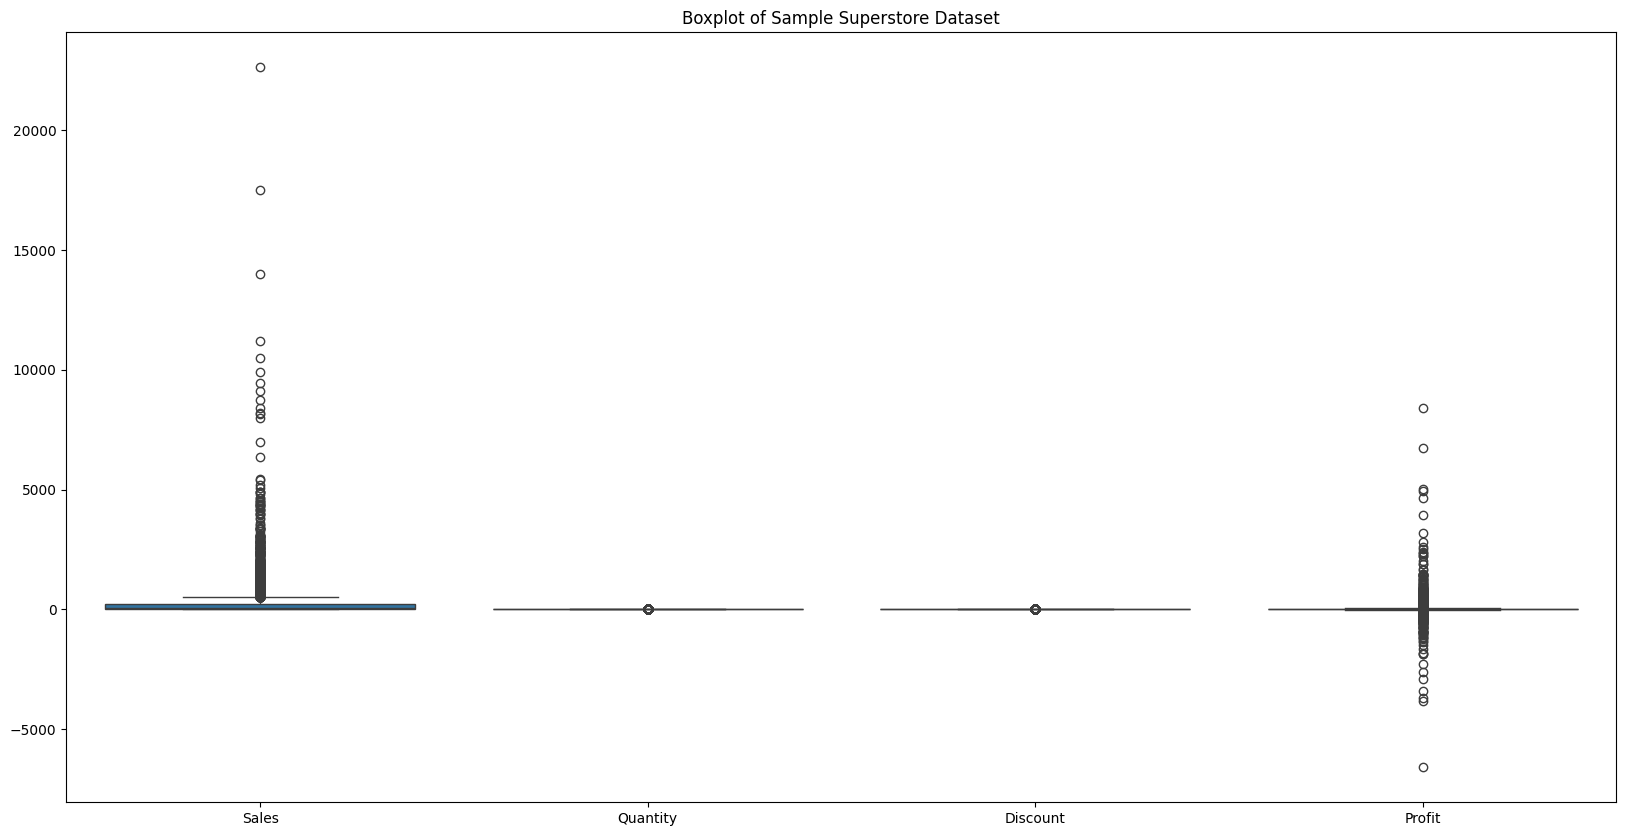

In [159]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=SS)
plt.title('Boxplot of Sample Superstore Dataset')
plt.show()

In [160]:
columns = SS.select_dtypes(include = 'number')
def Removing_outliers(columns):
    for column in columns:
        Q1 = SS[column].quantile(0.25)
        Q3 = SS[column].quantile(0.75)
        IQR = Q3 - Q1

    #Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter out the outliers
    SS = SS[(SS[column] >= lower_limit) & (SS[column] <= upper_limit)]
    SS.reset_index(drop=True, inplace=True)

In [161]:
SS.reset_index(drop=True, inplace=True)
SS

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9973,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9974,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9975,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


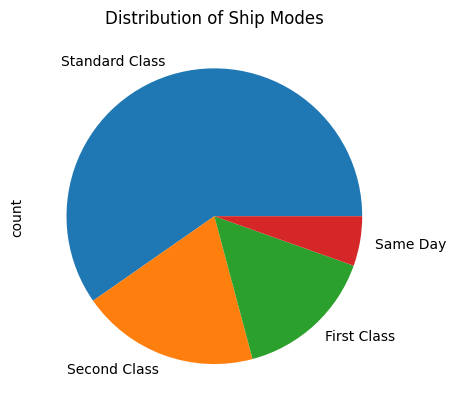

In [162]:
SS['Ship Mode'].value_counts().plot(kind='pie')
plt.title('Distribution of Ship Modes')
plt.show()

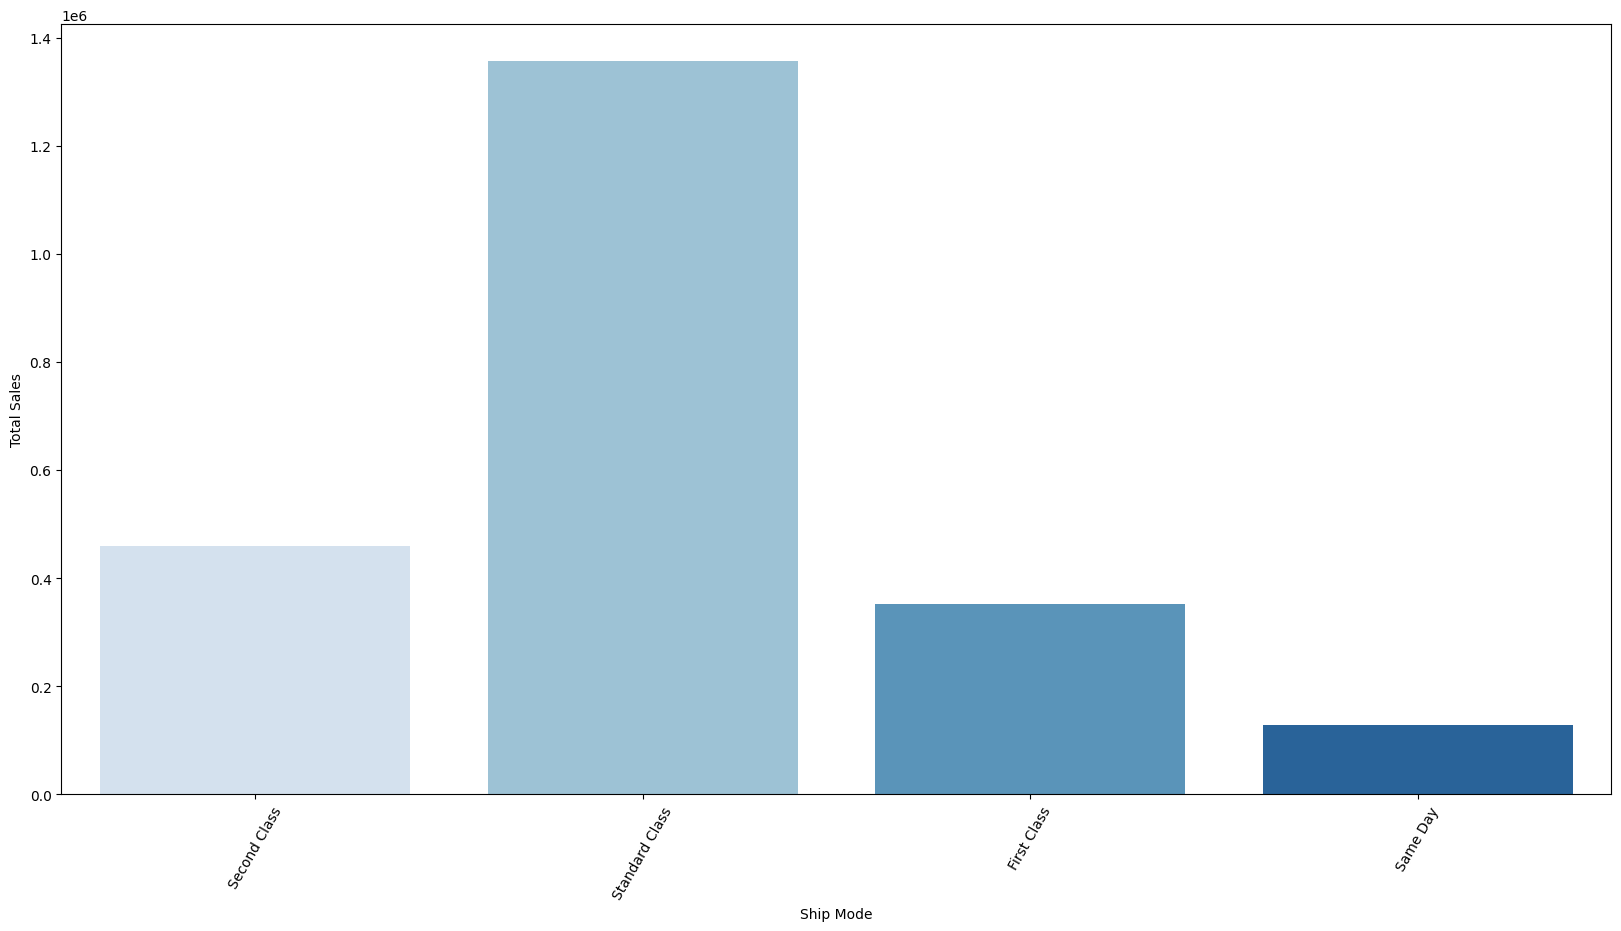

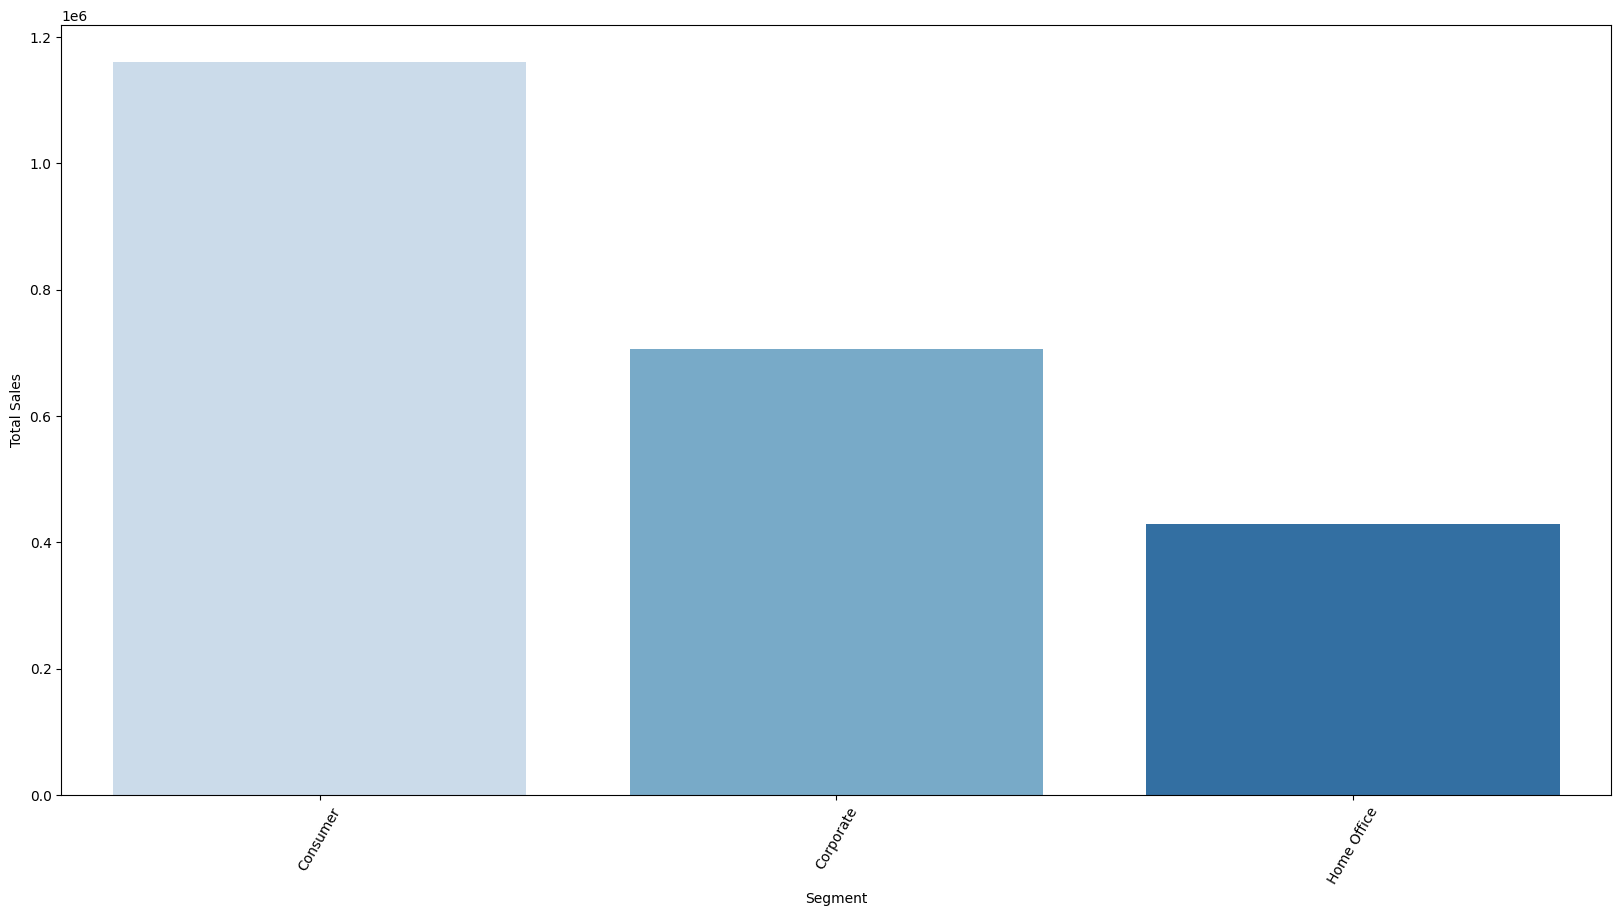

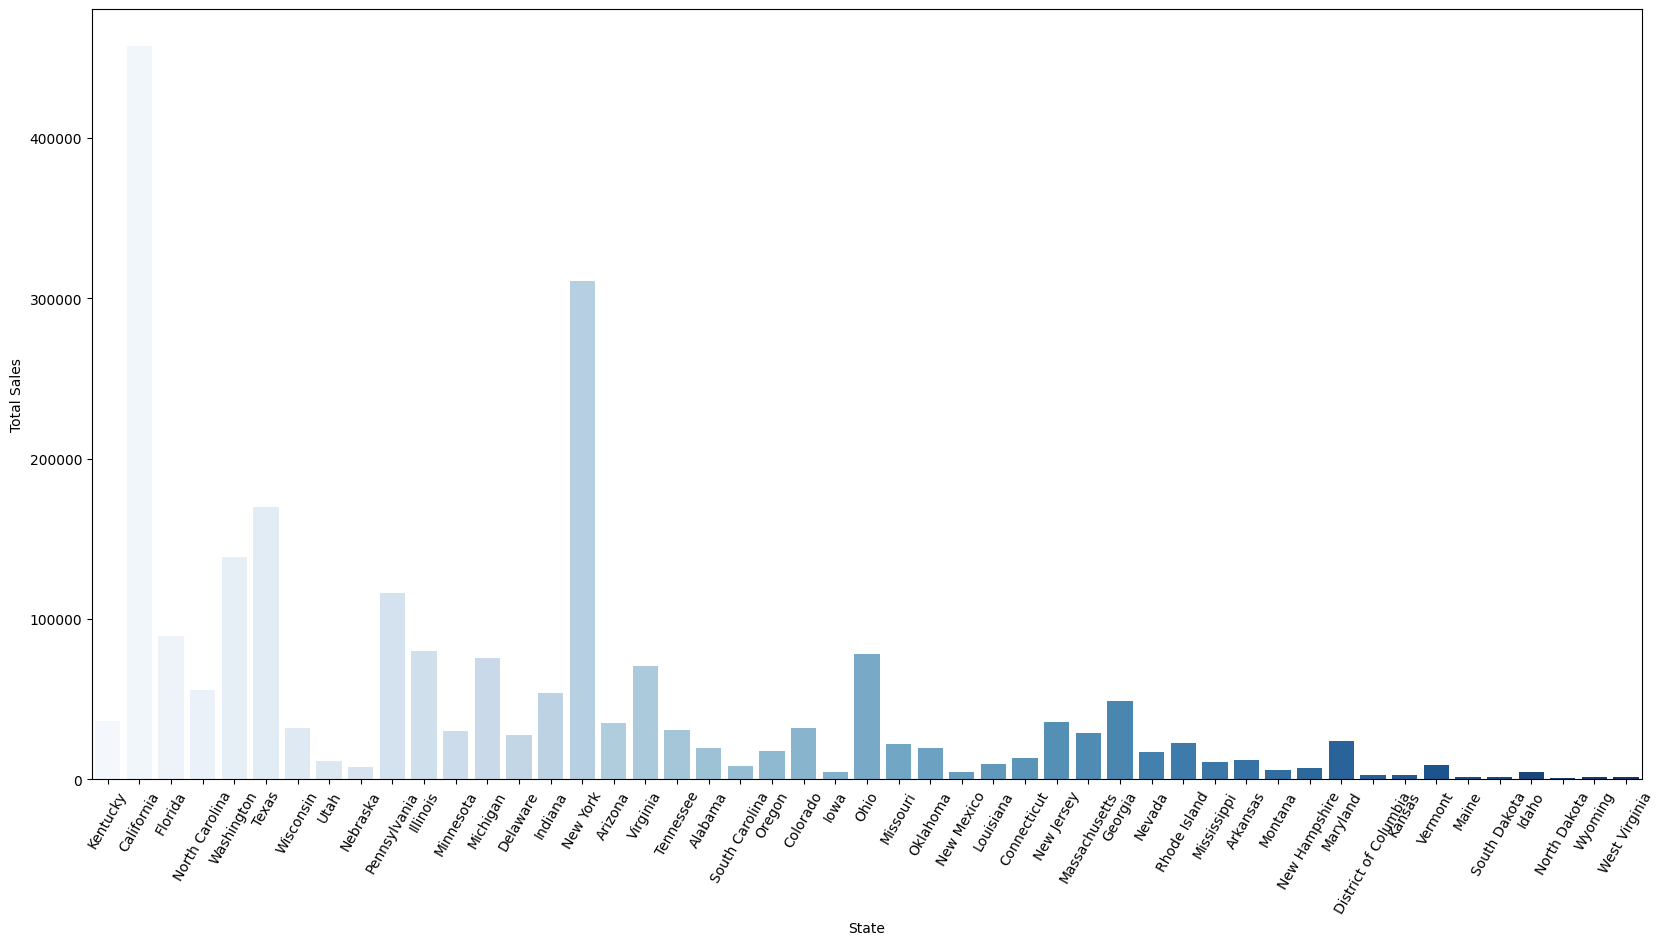

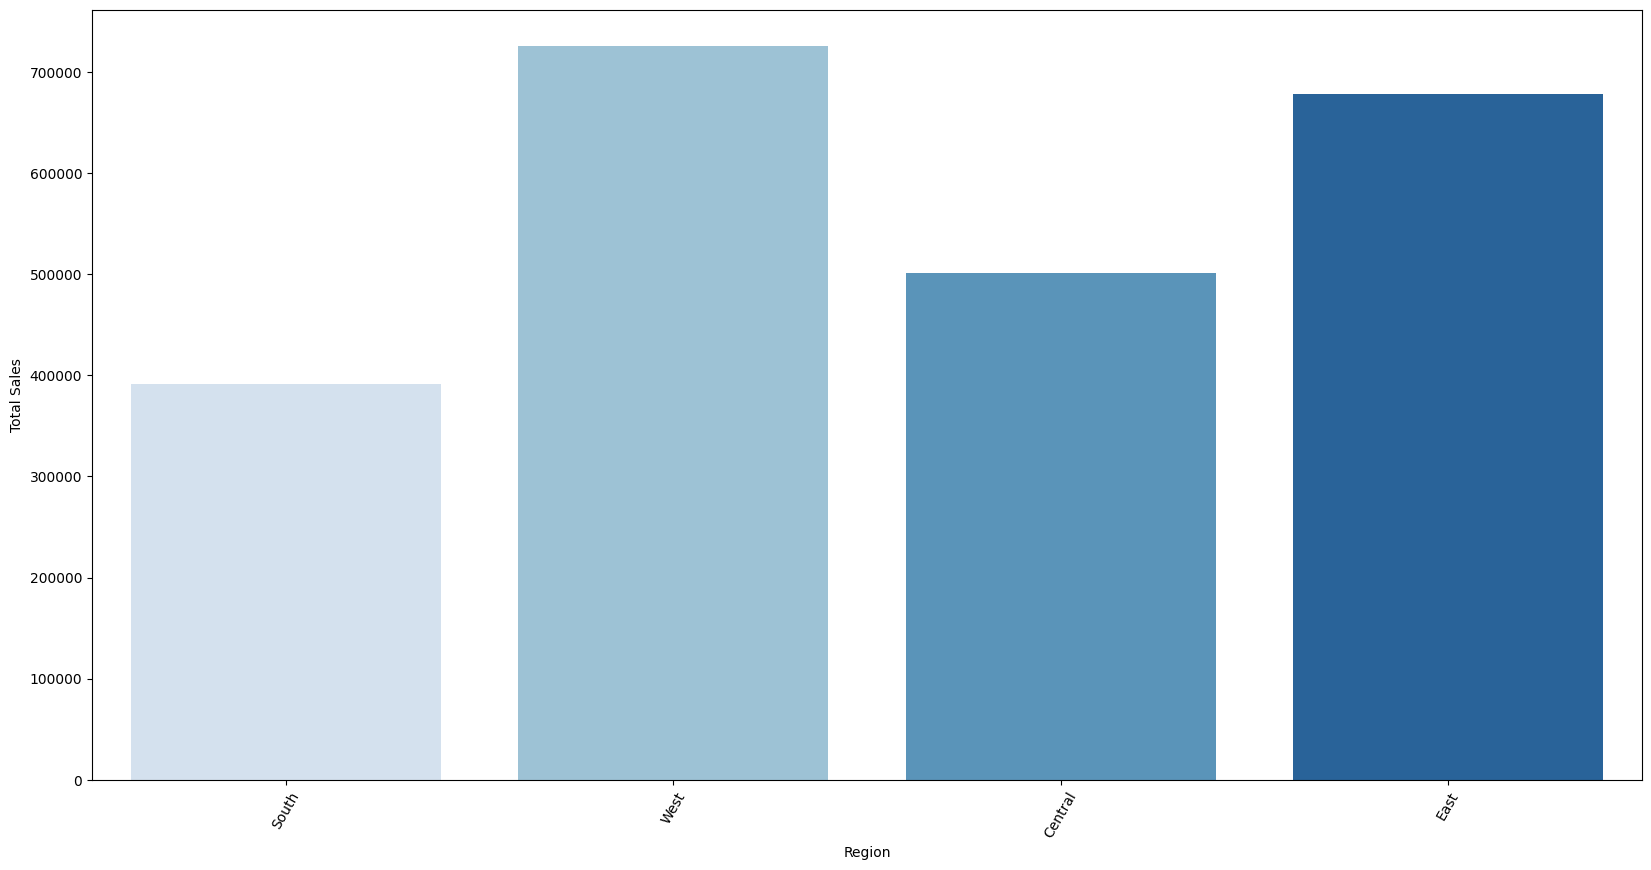

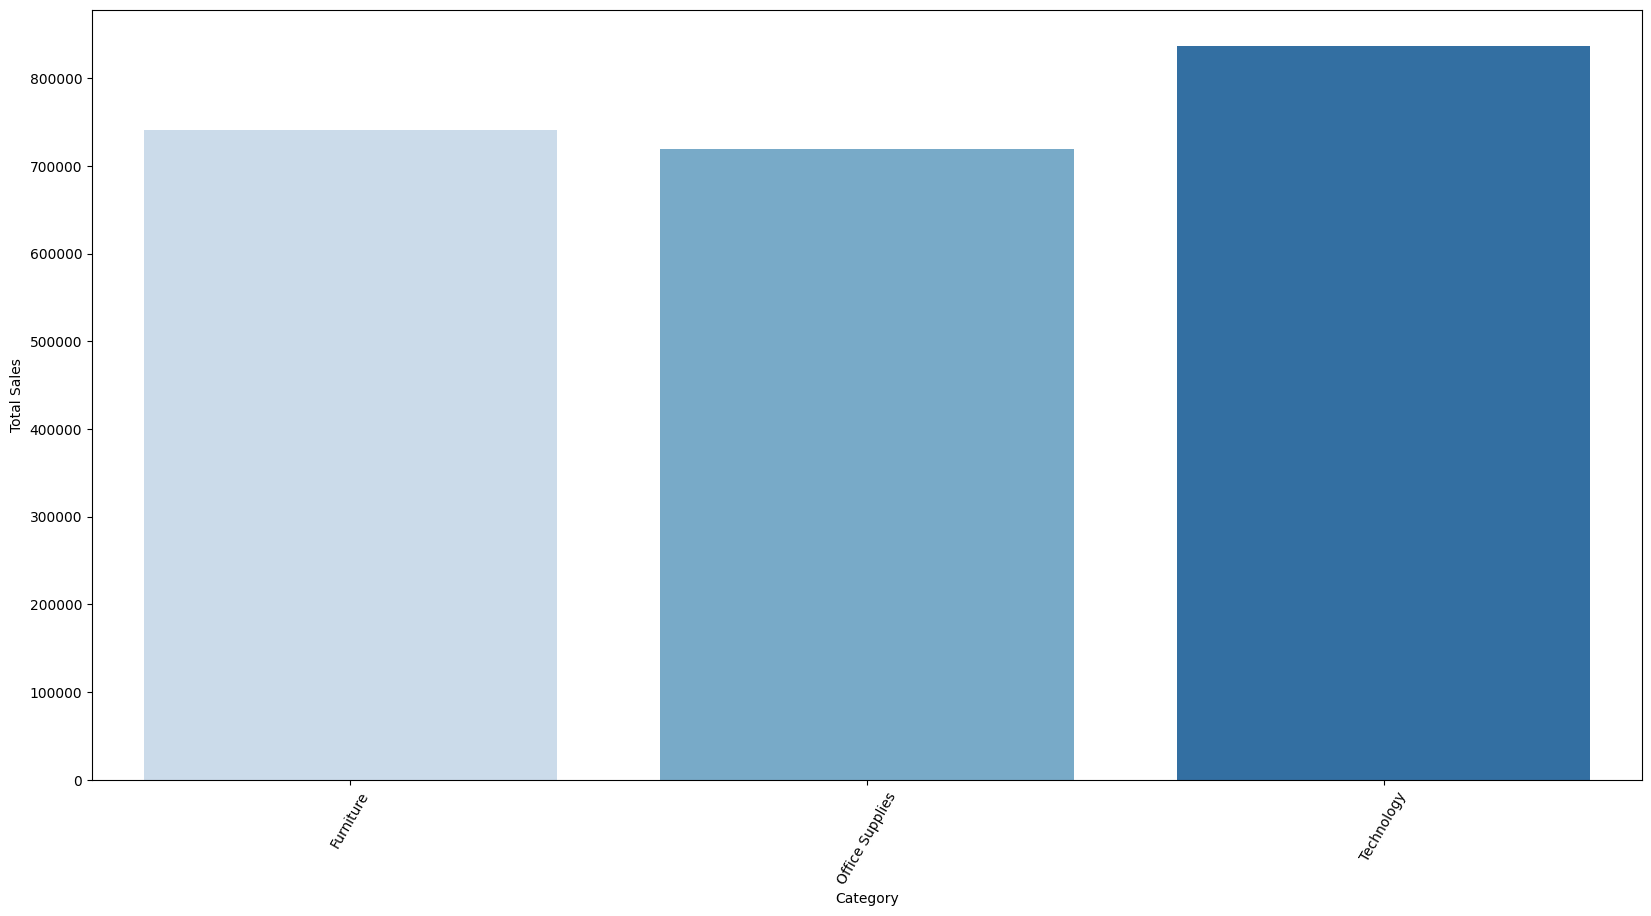

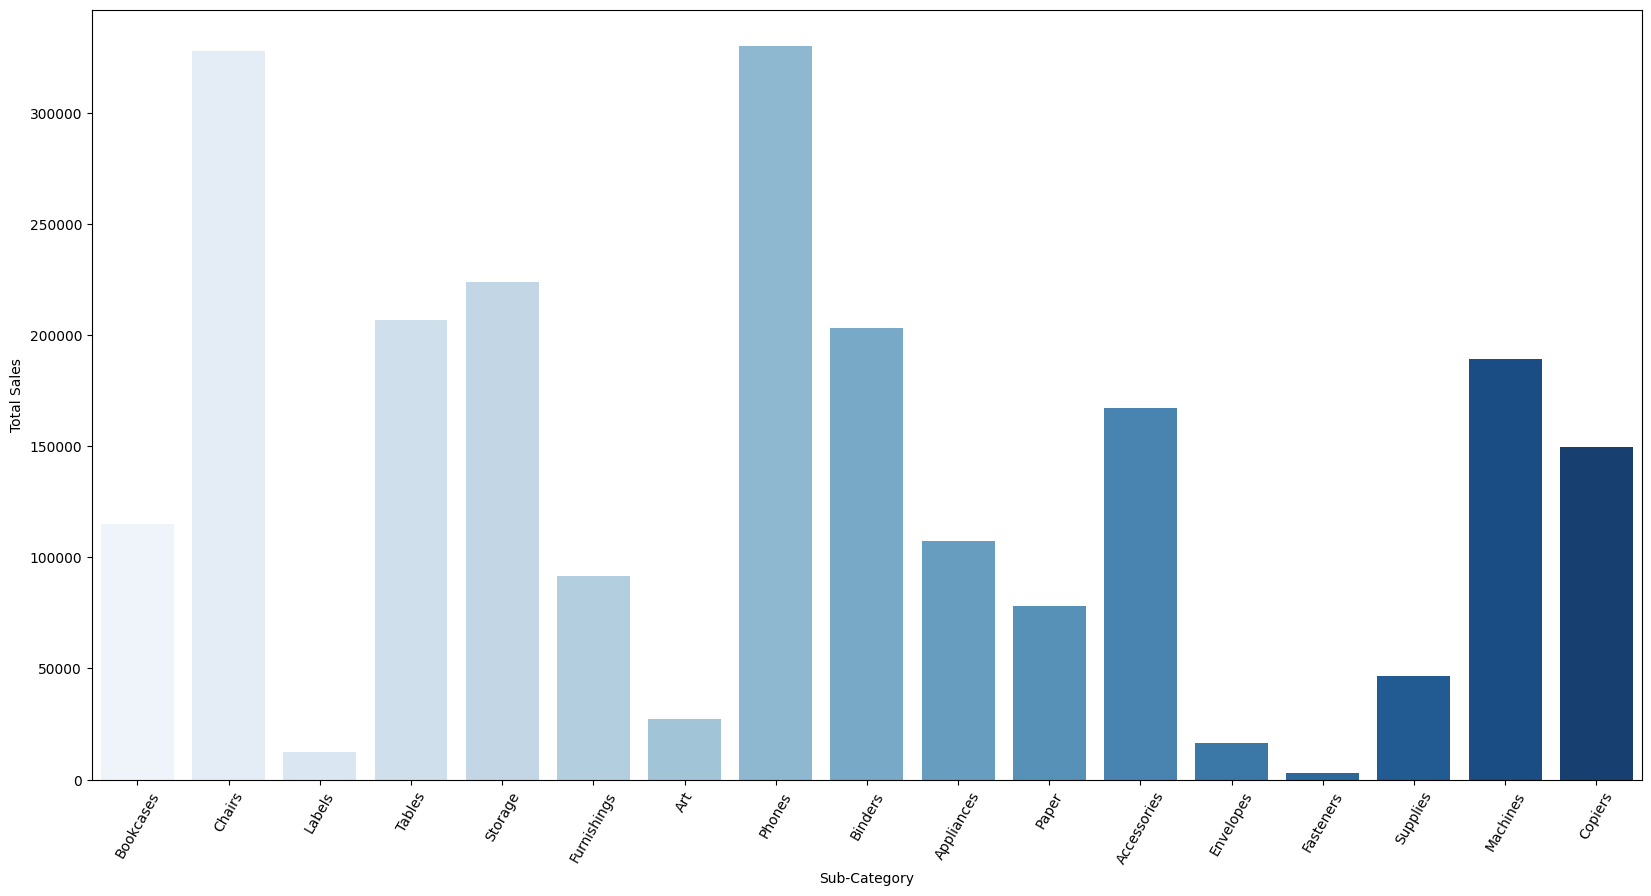

In [163]:
categorical_features = ['Ship Mode', 'Segment' , 'State', 'Region', 'Category', 'Sub-Category']
sales = SS['Sales']

# Ignore warnings temporarily
warnings.filterwarnings("ignore")

for col in categorical_features:
    plt.figure(figsize=(20, 10))
    sns.barplot(x=col, y=sales, data=SS, estimator=sum, ci=None, palette='Blues')
    plt.ylabel("Total Sales")
    plt.xlabel(col)
    plt.xticks(rotation=60)
    plt.show()

# Resetting warnings to default behavior
warnings.filterwarnings("default")

## Export the dataframe to excel file


In [164]:
## Export the dataframe to excel file
file_name = 'SampleSuperstore_Cleaned.xlsx'
SS.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

ImportWarning
 
warnings.filterwarnings("ignore", category=DeprecationWarning)


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\writer\excel.py:292: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  workbook.properties.modified = datetime.datetime.utcnow()


DataFrame is written to Excel File successfully.


In [165]:
def label_encoding(column):
    for column in columns :
        
        # Initialize LabelEncoder
        label_encoder = LabelEncoder()
        # Encode categorical variables
        SS[column] = label_encoder.fit_transform(SS[column])


columns = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category', 'Country', 'City']
label_encoding(columns)



# Finding relationships


In [166]:
SS.corr()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,1.000000,-0.004652,NaN,-0.004018,0.011774,-0.024384,-0.003825,-0.003466,-0.001764,0.022629,-0.000046,-0.006568
Segment,-0.004652,1.000000,NaN,0.005416,-0.002976,-0.005621,0.010548,0.011221,0.010936,0.008183,-0.017006,0.013419
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,-0.004018,0.005416,NaN,1.000000,0.009587,0.281052,0.013530,-0.006802,0.005939,-0.000878,-0.151003,0.024287
State,0.011774,-0.002976,NaN,0.009587,1.000000,-0.445149,0.006595,-0.002682,0.004131,-0.000480,0.162957,-0.025304
Region,-0.024384,-0.005621,NaN,0.281052,-0.445149,1.000000,-0.005277,0.008522,0.004508,0.013606,-0.211995,0.022295
Category,-0.003825,0.010548,NaN,0.013530,0.006595,-0.005277,1.000000,-0.075875,0.040116,-0.003839,-0.063086,0.091507
Sub-Category,-0.003466,0.011221,NaN,-0.006802,-0.002682,0.008522,-0.075875,1.000000,0.060171,-0.017052,-0.153026,-0.029472
Sales,-0.001764,0.010936,NaN,0.005939,0.004131,0.004508,0.040116,0.060171,1.000000,0.200722,-0.028311,0.479067
Quantity,0.022629,0.008183,NaN,-0.000878,-0.000480,0.013606,-0.003839,-0.017052,0.200722,1.000000,0.008678,0.066211


In [167]:
SS = SS.drop(columns=['Country'])


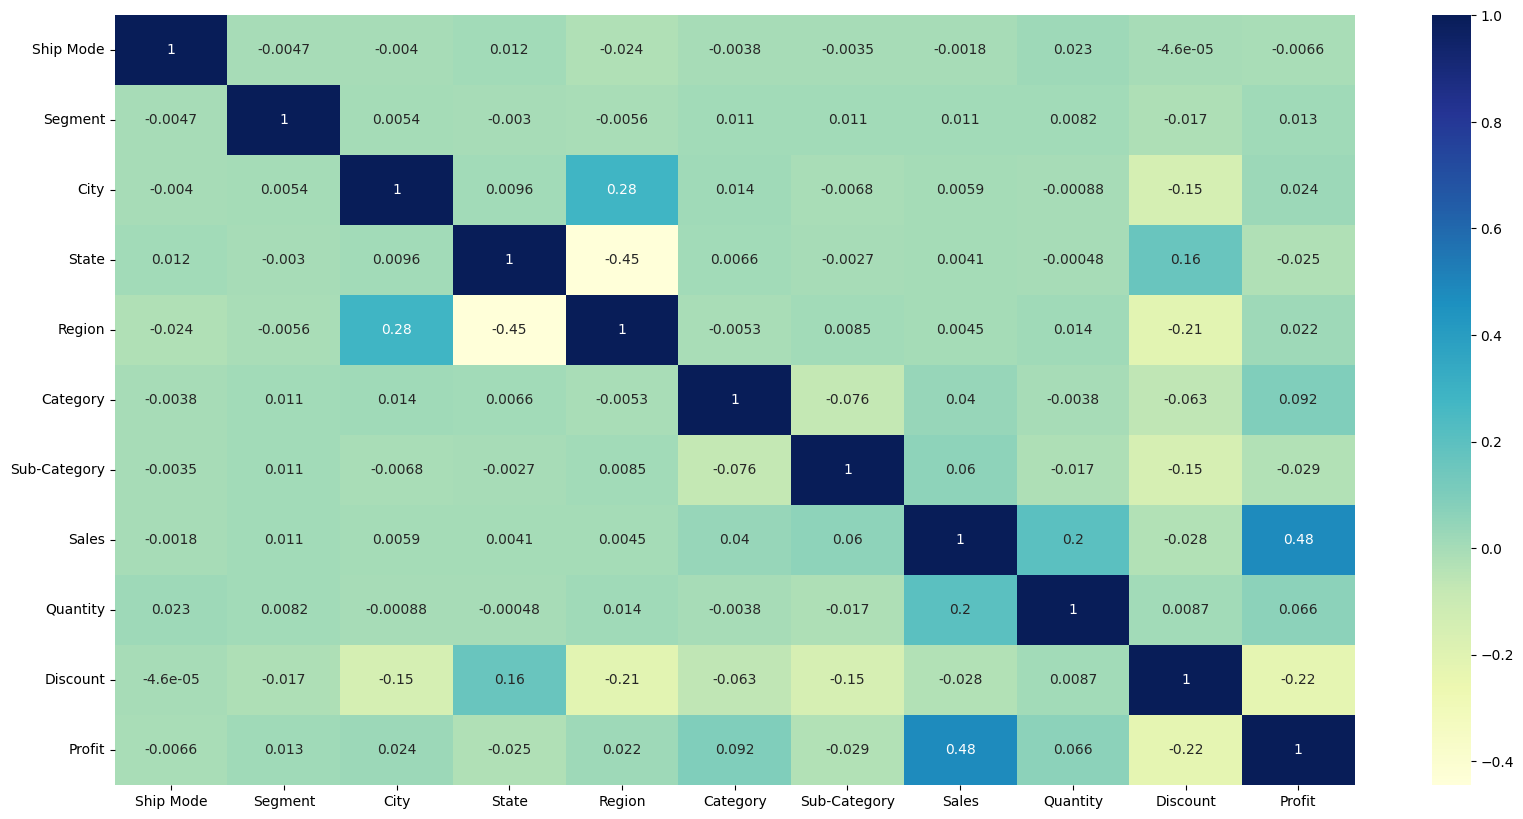

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(SS.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [169]:
SS.skew()

Ship Mode       -1.165309
Segment          0.662440
City            -0.252533
State           -0.030663
Region          -0.002288
Category         0.020744
Sub-Category    -0.013857
Sales           12.963770
Quantity         1.276709
Discount         1.683386
Profit           7.554748
dtype: float64